Features : Technical indicators and historical data

In [0]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:
df=pd.read_csv("final.csv")
df=df[df['comp']=='Adani Ports & SEZ']
df

In [266]:
df['adj'] = df[['adj_close']].shift(+1)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Category,Unnamed: 0.1.1.1,date,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch,adj
0,0,0,0,Transportation,0,01-07-2015,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006,NaN
1,1,1,1,Transportation,1,02-07-2015,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902,303.809296
2,2,2,2,Transportation,2,03-07-2015,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651,308.445007
3,3,3,3,Transportation,3,06-07-2015,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382,313.080688
4,4,4,4,Transportation,4,07-07-2015,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852,312.397553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,1169,1169,1169,Transportation,1169,01-04-2020,247.800003,235.050003,246.050003,244.800003,4034211,244.800003,Adani Ports & SEZ,-57.735080,255.099999,33.572445,42.784031,251.300003
1170,1170,1170,1170,Transportation,1170,03-04-2020,252.800003,238.899994,246.000000,244.800003,7210403,244.800003,Adani Ports & SEZ,-57.215969,252.243333,33.572445,52.022402,244.800003
1171,1171,1171,1171,Transportation,1171,07-04-2020,255.850006,245.600006,254.199997,248.100006,7360798,248.100006,Adani Ports & SEZ,-43.870563,249.266667,35.331183,56.129437,244.800003
1172,1172,1172,1172,Transportation,1172,08-04-2020,255.850006,242.750000,248.000000,250.850006,6897792,250.850006,Adani Ports & SEZ,-40.448037,248.563334,36.824605,68.357152,248.100006


In [0]:
X=df[['adj','wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[1:int(0.8*len(X))]
X_train_date=df['date'][1:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[1:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
X_test

In [270]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
preds = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

7.21710701059695

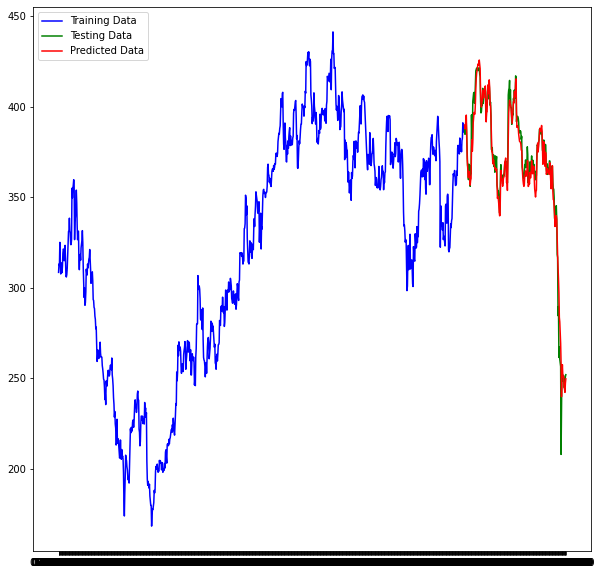

In [272]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.plot(X_test_date,preds, 'red', label='Predicted Data')
plt.legend()
plt.show()